# Connectin Jupyter Notebook with D3

First I need to initialize the JavaScript environment to provide a virtual DOM and d3.

**Make sure to only execute this once. Otherwise it will display ugly errors ;-)**

In [3]:
var jsdom = require("jsdom");
const { JSDOM } = jsdom;
const { document } = (new JSDOM(`...`)).window;

var d3 = require("d3");

Then, let's create an SVG object that we later draw into.

In [61]:
var svg = d3.select(document.body).append("svg");

Now I need to find some data...

In [59]:
var data = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55];

Define what to do with the data.

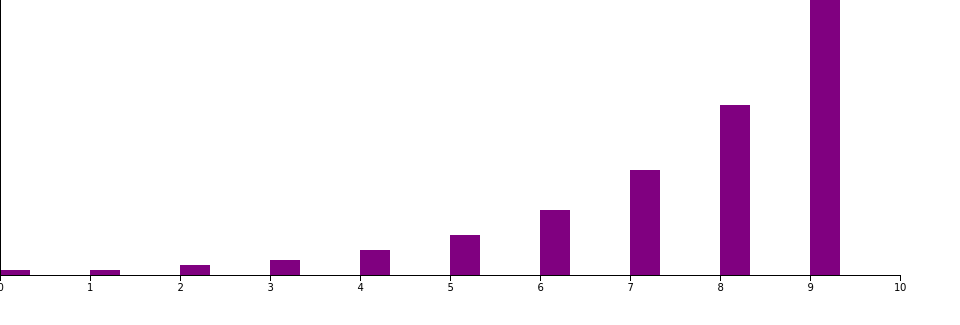

In [92]:
var scaleFactor = 5;

var margin = {top: 20, right: 20, bottom: 30, left: 40},
    width = 960 - margin.left - margin.right,
    height = d3.max(data) * scaleFactor;

var x = d3.scaleLinear()
          .range([0, width]);
var y = d3.scaleLinear()
          .range([d3.max(data) * scaleFactor, 0]);

// refer to the virtual SVG DOM object        
svg.attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform", 
          "translate(" + margin.left + "," + margin.top + ")");

x.domain([0, data.length]);
y.domain([0, d3.max(data)]);

svg.selectAll(".bar")
      .data(data)
    .enter().append("rect")
      .attr("class", "bar")
        .style("fill", "purple")
      .attr("x", function(d, i){return i * (width/data.length) ;})
      .attr("width", 30)
      .attr("y", y)
      .attr("height", function(d){return d * scaleFactor;});

svg.append("g")
  .attr("transform", "translate(0," + height + ")")
  .call(d3.axisBottom(x));

svg.append("g")
  .call(d3.axisLeft(y));


And display it!

In [ ]:
$$.svg(svg.node().outerHTML);

Currently M A G I C to me: Append it to the SVG output of Jupyter Notebook